# Test for Model Building

## 1 Creat a random price line based on Brownian motion

In [1]:
#ln(S(y+t)/S(y))~N(mu,sigma) 几何布朗运动


import matplotlib.pyplot as plt
import numpy as np

def Price(f=0.02,u=0,t=200):
    v = f*np.random.randn(t)+u
    P=[1]
    for i in range (t):
        P.append(P[i]*np.exp(v[i]))
    plt.plot(P)
    plt.show()
    return P,v

In [ ]:
import matplotlib.pyplot as plt
#随机价格变化曲线
plt.subplot(2,2,1)
Price()

#价格上升通道曲线
#plt.subplot(2,2,2)
#Price(u=0.01)

#价格下降通道曲线
#plt.subplot(2,2,3)
#Price(u=-0.01)

plt.show()

## 2 HMM

### 2.1 Find up-zone and down-zone

In [5]:
def Find_zone(t=500,n=400,hl=15):
    P,V = Price(t=t)
    Z = []
    for i in range (hl):
        Z.append(-1)

    for i in range (n-2*hl):
        if P[i+2*hl] >= P[i]:
            Z.append(0)
        else:
            Z.append(1)

    for i in range (hl,n-hl):
        if Z[i] == 0:
            plt.plot([i],[P[i]],'ro')
        elif Z[i] == 1:
            plt.plot([i],[P[i]],'go')
    plt.show()
    return P,V,Z

In [ ]:
P,Z = Find_zone(t=1000,hl=30)

### 2.2 Count Parameters

In [ ]:
# CM:    U    D        PM:   +    -
#     U  P1   P3          U  P1   P3
#     D  P2   P4          D  P2   P4

In [12]:
def f(x):
    if x >= 0:
        return 0
    else :
        return 1
def Count_Para(t=1000,n=800,hl=15):
    P,V,Z = Find_zone(t=t,n=n,hl=hl)
    CM = [[0,0],
          [0,0]]#转换矩阵
    PM = [[0,0],
          [0,0]]#概率矩阵

    for i in range (hl,n-hl-1):
        PM[Z[i]][f(P[i+1]-P[i])]+=1
        CM[Z[i]][Z[i+1]]+=1
        
    for i in range (2):
        x=PM[i][0]+PM[i][1]
        PM[i][0] = PM[i][0]*1.0/x
        PM[i][1] = PM[i][1]*1.0/x
        x=CM[i][0]+CM[i][1]
        CM[i][0] = CM[i][0]*1.0/x
        CM[i][1] = CM[i][1]*1.0/x
        
    return PM,CM,P,V,Z

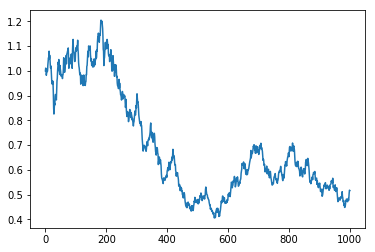

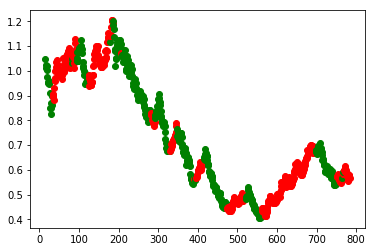

([[0.5654450261780105, 0.43455497382198954],
  [0.4082687338501292, 0.5917312661498708]],
 [[0.9659685863874345, 0.034031413612565446],
  [0.03617571059431524, 0.9638242894056848]],
 [1,
  1.0111430223039066,
  1.0035831750457471,
  0.9822798565272444,
  0.9912995491537789,
  1.0049690995905385,
  0.9969810082782828,
  0.9996181881169154,
  1.0240671132939911,
  1.0374430862109532,
  1.0533804790914674,
  1.0506840041099552,
  1.0796081964284896,
  1.0494988677877775,
  1.0633944105715711,
  1.0475838422936827,
  1.023728820516571,
  1.0112158898190755,
  1.0198920131037514,
  1.003289103060487,
  0.9734031814798764,
  0.9520582901264893,
  0.9536733161463118,
  0.9454054142067414,
  0.9592562863491773,
  0.9495650716446901,
  0.9101814340890996,
  0.8489717403373571,
  0.8254602334867905,
  0.8493827638252707,
  0.8688766776482225,
  0.8621275736694786,
  0.8968865677002698,
  0.9045886726376334,
  0.9009318530619009,
  0.8934331082083824,
  0.8825461890829283,
  0.9293971446597308,
 

In [13]:
Count_Para()

### 2.3 Optimization

In [ ]:
# CM:    U    D        PM:   +    -
#     U  P1   P3          U  P1   P3
#     D  P2   P4          D  P2   P4

In [34]:
def Viterbi(V,PM,CM):
    pi=[[1,1]]
    for i in range (1,len(V)):
        pi.append([0,0])
        if V[i] >= 0:
            pi[i][0]=PM[0][0]*max(pi[i-1][0]*CM[0][0],pi[i-1][1]*CM[1][0])
            pi[i][1]=PM[1][0]*max(pi[i-1][0]*CM[0][1],pi[i-1][1]*CM[1][1])
        else:
            pi[i][0]=PM[0][1]*max(pi[i-1][0]*CM[0][0],pi[i-1][1]*CM[1][0])
            pi[i][1]=PM[1][1]*max(pi[i-1][0]*CM[0][1],pi[i-1][1]*CM[1][1])
    
    if pi[len(V)-1][0] >= pi[len(V)-1][1]:
        hs = "U";pr_hs = "U"
    else:
        hs = "D";pr_hs = "D"
    
    for i in range (len(V)-2,-1,-1):
        if pr_hs=="D":
            if pi[i][0]*CM[0][1] > pi[i][1]*CM[1][1]:
                pr_hs="U"
            else:
                pr_hs="D"
        if pr_hs=="U":
            if pi[i][0]*CM[0][0] > pi[i][1]*CM[1][0]:
                pr_hs="U"
            else:
                pr_hs="D"
        hs=pr_hs+hs
        
    return hs

In [53]:
def F(x):
    if x == 'U':
        return 0
    else:
        return 1
def f(x):
    if x >= 0:
        return 0
    else:
        return 1
def Count_hs(hs,V):
    CM = [[0,0],
          [0,0]]#转换矩阵
    PM = [[0,0],
          [0,0]]#概率矩阵

    for i in range (len(hs)-1):
        PM[F(hs[i])][f(V[i])]+=1
        CM[F(hs[i])][F(hs[i+1])]+=1
    print(PM,CM)
        
    for i in range (2):
        x=PM[i][0]+PM[i][1]
        PM[i][0] = PM[i][0]*1.0/x
        PM[i][1] = PM[i][1]*1.0/x
        x=CM[i][0]+CM[i][1]
        CM[i][0] = CM[i][0]*1.0/x
        CM[i][1] = CM[i][1]*1.0/x
        
    return PM,CM


V = [1,1,1,1,1,1,-1,-1,-1,-1,-1,1,1,1,1,1,1,-1,-1,-1,-1,-1,-1,-1,-1,-1]
CM=[[0.6, 0.4], [0.45, 0.55]]
PM=[[0.9, 0.1], [0.1, 0.9]]
P=[[0,0], [0,0]]
C=[[0,0], [0,0]]
while PM != P and CM != C:
    P = PM;C = CM
    hs = Viterbi(V,P,C)
    print(hs)
    PM,CM = Count_hs(hs,V)
hs

UUUUUUDDDDDUUUUUUDDDDDDDDD
([[12, 0], [0, 13]], [[10, 2], [1, 12]])
UUUUUUDDDDDUUUUUUDDDDDDDDD
([[12, 0], [0, 13]], [[10, 2], [1, 12]])


'UUUUUUDDDDDUUUUUUDDDDDDDDD'

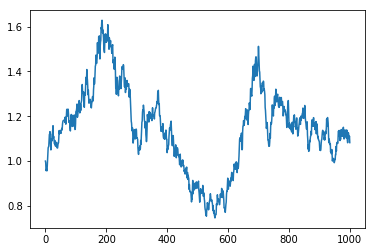

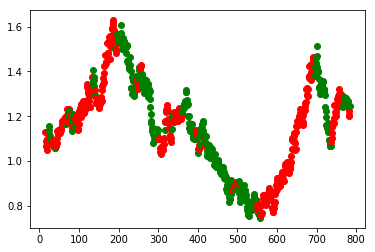

([[0.5354523227383863, 0.46454767726161367], [0.46111111111111114, 0.5388888888888889]], [[0.9242053789731052, 0.07579462102689487], [0.08333333333333333, 0.9166666666666666]])
UUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUUU

ZeroDivisionError: float division by zero

In [55]:
PM,CM,P,V,Z = Count_Para()
print(PM,CM)
Viterbi(V,PM,CM)
P=[[0,0], [0,0]]
C=[[0,0], [0,0]]
while PM != P and CM != C:
    P = PM;C = CM
    hs = Viterbi(V,P,C)
    print(hs)
    PM,CM = Count_hs(hs,V)
hs

False